<a href="https://colab.research.google.com/github/gayatripatil3/Capstone_Implementation/blob/main/C_Actual_Incremental_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Default title text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD

import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)


In [ ]:
from google.colab import files
files.upload()

Saving google_books_1299.csv to google_books_1299.csv


{'google_books_1299.csv': b'Book_id,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date\r\n0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,"NO SAFE PLACE LEFT At great cost to the Garrison and the Survey Corps, Commander Erwin has managed to recover Eren from the Titans who tried to carry him off. But during the battle, Eren manifested yet another power he doesn\'t understand. As Eren and Krista find new enemies, the Survey Corps faces threats from both inside and outside the walls. And what will happen to Ymir, now that she has decided to make herself the Titans\' prize?",Kodansha Comics,192,none,9.78E+12,English,"Jul 31, 2014"\r\n1,Antiques Roadkill: A Trash \'n\' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,"Determined to make a new start in her quaint hometown on the banks of the Mississippi, Brandy Borne never dreams she\'ll become the prime suspect in a murder case. . . \n\nMoving back in with her eccen

In [ ]:
df = pd.read_csv('google_books_1299.csv',error_bad_lines=False)


<ipython-input-3-d5826cbc3fb3>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('google_books_1299.csv',error_bad_lines=False)


In [ ]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

In [ ]:
df['Year'] = pd.to_datetime(df['published_date']).dt.to_period('Y')

In [ ]:
df2 = df.copy()
df2

,Book_id,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,Year
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192.0,none,9.78E+12,English,2014-07-31,2014
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78E+12,English,2007-07-01,2007
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78E+12,English,2019-11-05,2019
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320.0,none,9.78E+12,English,2009-03-01,2009
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78E+12,English,2009-01-08,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1294,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,41.82,SAR,A short gift book of festive hospital diaries ...,Pan Macmillan,112.0,"Medical , Health Care Delivery",9.78E+12,English,2019-10-17,2019
1295,1295,Why We Sleep: The New Science of Sleep and Dreams,Matthew Walker,4.8,52,46.85,SAR,'Astonishing ... an amazing book ... absolutel...,Penguin UK,368.0,"Psychology , Cognitive Psychology &amp, Cognition",9.78E+12,English,2017-09-28,2017
1296,1296,How to Understand Business Finance: Edition 2,Bob Cinnamon,3.5,4,46.85,SAR,The modern marketplace is increasingly unpredi...,Kogan Page Publishers,176.0,none,9.78E+12,English,2010-04-03,2010
1297,1297,Spider-Man: Kraven's Last Hunt,J. M. DeMatteis,4.6,74,43.28,SAR,"Collects Web of Spider-Man #31-32, Amazing Spi...",Marvel Entertainment,168.0,none,9.78E+12,English,2014-12-10,2014


In [ ]:
df2 = df.drop_duplicates(keep=False)


In [ ]:
df2 = df2.drop_duplicates(['title'], keep='first')

In [ ]:
df2['description'] = df2['description'].fillna('')
df2['voters'] = df2['voters'].replace(',','', regex=True)
df2['voters'] = df2['voters'].fillna(0)
df2['rating'] = df2['rating'].fillna(0)
df2['voters'] = df2['voters'].astype(int)

In [ ]:
avg_rating = round(df2['rating'].mean(),1)
avg_num = round(df2['page_count'].mean(),)

print(f"The average ratings of the book are {avg_rating}.\nThe average number of pages are {avg_num}. ")


The average ratings of the book are 4.2.
The average number of pages are 39756097910. 


In [ ]:
authors = df2['author'].value_counts().head(10)


In [ ]:
books = df2.sort_values('rating', ascending = False).head(10).set_index('title')

In [ ]:
rating = df2


In [ ]:
books_rated = rating[['rating','title']].groupby('title').mean().sort_values('rating', axis=0, ascending = False).head(10)


In [ ]:
auth_rated = df2.groupby('author')['rating'].mean().sort_values(ascending=False).head(20)


In [ ]:
publisher = df2['publisher'].value_counts().head(10)


In [ ]:
pages = rating[['page_count','title']].groupby('title').mean().sort_values('page_count', axis=0, ascending = False).head(10)


In [ ]:
def create_rating(row):
    """The function to create a column rating between"""
    if row >= 0 and row <=1:
        return '0-1'
    if row >= 1 and row <=2:
        return '1-2'
    if row >= 2 and row <=3:
        return '2-3'
    if row >= 3 and row <=4:
        return '3-4'
    if row >= 4 and row <=5:
        return '4-5'

In [ ]:
df2['rating_between'] = df2['rating'].apply(create_rating)

In [ ]:
df2.head(20)

,Book_id,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,Year,rating_between
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192.0,none,9.78E+12,English,2014-07-31,2014,4-5
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78E+12,English,2007-07-01,2007,3-4
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78E+12,English,2019-11-05,2019,3-4
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320.0,none,9.78E+12,English,2009-03-01,2009,3-4
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78E+12,English,2009-01-08,2009,4-5
5,5,"A Feast for Crows (A Song of Ice and Fire, Boo...",George R.R. Martin,4.5,832,29.29,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,864.0,none,9.78E+12,English,2011-02-24,2011,4-5
6,6,God of War: The Official Novelization,J.M. Barlog,4.5,94,15.82,SAR,The novelization of the highly anticipated God...,Titan Books,400.0,"Fiction , Media Tie-In",9.78E+12,English,2018-08-28,2018,4-5
7,7,Edgedancer: From the Stormlight Archive,Brandon Sanderson,4.8,221,36.79,SAR,From #1 New York Times bestselling author Bran...,Tor Books,226.0,"Fiction , Fantasy , Epic",9.78E+12,English,2017-10-17,2017,4-5
8,8,"Blood, Sweat, and Pixels: The Triumphant, Turb...",Jason Schreier,4.3,135,50.25,SAR,NATIONAL BESTSELLERDeveloping video games—hero...,HarperCollins,304.0,"Games &amp, Activities , Video &amp, Electronic",9.78E+12,English,2017-09-05,2017,4-5
9,9,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,41.82,SAR,A short gift book of festive hospital diaries ...,Pan Macmillan,112.0,"Biography &amp, Autobiography , Medical (incl....",9.78E+12,English,2019-10-17,2019,4-5


In [ ]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language'])

In [ ]:
def make_recommendations(name):
    """The function to get recommendations"""
    book_list = []
    book_id = df2[df2['title'] == name].index
    book_id = book_id[0]
    for newid in indices[book_id]:
        book_list.append(df2.loc[newid].title)
    print("Recommended books are:\n")
    for i in range(0,len(book_list)):
        print(f"{i+1}){book_list[i]}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans



# Assuming you have a column named 'title' containing book titles
book_titles = df2['title']

# Create a TF-IDF vectorizer to convert text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the text data
X = tfidf_vectorizer.fit_transform(book_titles)

# Perform K-means clustering
n_clusters = 4  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Add cluster labels to the original DataFrame
df2['cluster_label'] = kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans



# Assuming you have a column named 'title' containing book titles
book_titles = df2['generes']

# Create a TF-IDF vectorizer to convert text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the text data
X = tfidf_vectorizer.fit_transform(book_titles)

# Perform K-means clustering
n_clusters = 4  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Add cluster labels to the original DataFrame
df2['cluster_label'] = kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df2

,Book_id,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,Year,rating_between,cluster_label
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192.0,none,9.78E+12,English,2014-07-31,2014,4-5,1
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78E+12,English,2007-07-01,2007,3-4,3
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78E+12,English,2019-11-05,2019,3-4,3
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320.0,none,9.78E+12,English,2009-03-01,2009,3-4,1
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78E+12,English,2009-01-08,2009,4-5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,746,The Complete Art of War,Sun Tzu,4.7,110,7.84,SAR,Collected here in this 4-in-1 omnibus are the ...,Simon and Schuster,667.0,"Political Science , Political Ideologies , Gen...",9.78E+12,English,2013-04-29,2013,4-5,3
790,790,(FREE SAMPLE) CTET English & Hindi Language 9 ...,Disha Experts,4.5,4,0.00,Free,,Disha Publications,23.0,none,Original pages,English,2019-11-06,2019,4-5,1
847,847,We,Yevgeny Zamyatin,4.3,49,7.13,SAR,Yevgeny Zamyatin's We is set in an urban glass...,Pan,226.0,"Fiction , Science Fiction , Action &amp, Adven...",9.78E+12,English,2013-01-15,2013,4-5,3
912,912,1 Sample Paper for CBSE Class 10 Science 2020 ...,Disha Experts,4.7,7,0.00,Free,,Disha Publications,25.0,none,Original pages,English,2019-10-21,2019,4-5,1


**Final Implementation - Incremental Learning**

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split  # Add this import

class IncrementalRecommendationSystem:
    def __init__(self, df):
        self.df = df
        self.rating_weight = 0.7
        self.top_n = 6
        self.tfidf_vectorizer = TfidfVectorizer()
        self.scaler = MinMaxScaler()
        self.train_data = None  # Initialize train_data attribute
        self.test_data = None   # Initialize test_data attribute
        self.update_similarity_scores()

    def update_similarity_scores(self):

        # Calculate cosine similarity based on average ratings
        rating_similarity = cosine_similarity(self.df[['rating']])

        # Calculate cosine similarity based on book titles
        title_matrix = self.tfidf_vectorizer.fit_transform(self.df['title'])
        title_similarity = cosine_similarity(title_matrix)

        # Normalize the rating similarity scores to the range [0, 1]
        rating_similarity = self.scaler.fit_transform(rating_similarity)

        # Calculate cosine similarity based on Generes ratings
        generes_matrix = self.tfidf_vectorizer.fit_transform(self.df['generes'])
        generes_similarity = cosine_similarity(generes_matrix)

        # Normalize the generes similarity scores to the range [0, 1]
        generes_similarity = self.scaler.fit_transform(generes_similarity)

        # Calculate cosine similarity based on clusters
        cluster_similarity = cosine_similarity(self.df[['cluster_label']])

        # Normalize the cluster similarity scores to the range [0, 1]
        cluster_similarity = self.scaler.fit_transform(cluster_similarity)

        # Create a DataFrame from the combined similarity matrix
        self.combined_similarity = (
            self.rating_weight * rating_similarity +
            (1 - self.rating_weight) * cluster_similarity +
            (1 - self.rating_weight) * title_similarity +
            (1 - self.rating_weight) * generes_similarity
        )

        # Create a DataFrame from the combined similarity matrix
        self.combined_similarity_df = pd.DataFrame(
            self.combined_similarity,
            columns=self.df['title'],
            index=self.df['title']
        )

    def split_data(self, test_size=0.2):
        # Split the dataset into training and test sets
        self.train_data, self.test_data = train_test_split(self.df, test_size=test_size, random_state=42)


    def recommend_books(self, book_title):
        if book_title in self.df['title'].values:
            # Transpose the DataFrame and sort it by the specified row (book_title)
            similar_books = self.combined_similarity_df.loc[book_title].sort_values(ascending=False)[1:self.top_n+1].index.tolist()

            return similar_books
        else:
            return []

    def add_new_data(self, new_data):
        # Assuming new_data is a DataFrame with columns: 'title', 'rating', 'generes', 'cluster_label'
        self.df = pd.concat([self.df, new_data], ignore_index=True)
        self.update_similarity_scores()

# Example usage:
csv_file_path = r'C:\Users\ASUS\OneDrive\Desktop\books.csv'

book_title = "The Choice of Magic"

# Initialize the recommendation system

recommendation_system = IncrementalRecommendationSystem(df2)

# Split the initial data into training and test sets
recommendation_system.split_data()

# Obtain initial recommendations
recommended_books = recommendation_system.recommend_books(book_title)

if recommended_books:
    print(f"Recommendations for '{book_title}':")
    for i, book in enumerate(recommended_books):
        print(f"{i + 1}. {book}")
else:
    print(f"No recommendations found for '{book_title}'.")

# Suppose you have new data in the form of a DataFrame `new_data`
new_data = recommendation_system.test_data.copy()

# Add new data and update similarity scores
recommendation_system.add_new_data(new_data)

# Split the updated data into training and test sets
recommendation_system.split_data()

# Obtain updated recommendations
recommended_books = recommendation_system.recommend_books(book_title)

# Print updated recommendations (if any)
if recommended_books:
    print(f"\nUpdated Recommendations for '{book_title}':")
    for i, book in enumerate(recommended_books):
        print(f"{i + 1}. {book}")
else:
    print(f"No updated recommendations found for '{book_title}'.")


Recommendations for 'The Choice of Magic':
1. The Magic of Thinking Big
2. The Eye of the World: Book One of 'The Wheel of Time'
3. A Crown of Swords: Book Seven of 'The Wheel of Time'
4. Chronicle of the Unhewn Throne: (The Emperor's Blades, The Providence of Fire, The Last Mortal Bond)
5. The Tower of the Swallow: Witcher 6
6. A Game of Thrones: The Story Continues Books 1-5: A Game of Thrones, A Clash of Kings, A Storm of Swords, A Feast for Crows, A Dance with Dragons (A Song of Ice and Fire)

Updated Recommendations for 'The Choice of Magic':
1. The Magic of Thinking Big
2. The Magic of Thinking Big
3. The Eye of the World: Book One of 'The Wheel of Time'
4. A Crown of Swords: Book Seven of 'The Wheel of Time'
5. Chronicle of the Unhewn Throne: (The Emperor's Blades, The Providence of Fire, The Last Mortal Bond)
6. The Tower of the Swallow: Witcher 6


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split  # Add this import

class IncrementalRecommendationSystem:
    def __init__(self, df):
        self.df = df
        self.rating_weight = 0.7
        self.top_n = 6
        self.tfidf_vectorizer = TfidfVectorizer()
        self.scaler = MinMaxScaler()
        self.train_data = None  # Initialize train_data attribute
        self.test_data = None   # Initialize test_data attribute
        self.update_similarity_scores()

    def update_similarity_scores(self):

        # Calculate cosine similarity based on average ratings
        rating_similarity = cosine_similarity(self.df[['rating']])

        # Calculate cosine similarity based on book titles
        title_matrix = self.tfidf_vectorizer.fit_transform(self.df['title'])
        title_similarity = cosine_similarity(title_matrix)

        # Normalize the rating similarity scores to the range [0, 1]
        rating_similarity = self.scaler.fit_transform(rating_similarity)

        # Calculate cosine similarity based on Generes ratings
        generes_matrix = self.tfidf_vectorizer.fit_transform(self.df['generes'])
        generes_similarity = cosine_similarity(generes_matrix)

        # Normalize the generes similarity scores to the range [0, 1]
        generes_similarity = self.scaler.fit_transform(generes_similarity)

        # Calculate cosine similarity based on clusters
        cluster_similarity = cosine_similarity(self.df[['cluster_label']])

        # Normalize the cluster similarity scores to the range [0, 1]
        cluster_similarity = self.scaler.fit_transform(cluster_similarity)

        # Create a DataFrame from the combined similarity matrix
        self.combined_similarity = (
            self.rating_weight * rating_similarity +
            (1 - self.rating_weight) * cluster_similarity +
            (1 - self.rating_weight) * title_similarity +
            (1 - self.rating_weight) * generes_similarity
        )

        # Create a DataFrame from the combined similarity matrix
        self.combined_similarity_df = pd.DataFrame(
            self.combined_similarity,
            columns=self.df['title'],
            index=self.df['title']
        )

    def split_data(self, test_size=0.2):
        # Split the dataset into training and test sets
        self.train_data, self.test_data = train_test_split(self.df, test_size=test_size, random_state=42)


    def recommend_books(self, book_title):
        if book_title in self.df['title'].values:
            # Transpose the DataFrame and sort it by the specified row (book_title)
            similar_books = self.combined_similarity_df.loc[book_title].sort_values(ascending=False)[1:self.top_n+1].index.tolist()

            return similar_books
        else:
            return []

    def add_new_data(self, new_data):
        # Assuming new_data is a DataFrame with columns: 'title', 'rating', 'generes', 'cluster_label'
        self.df = pd.concat([self.df, new_data], ignore_index=True)
        self.update_similarity_scores()


    def split_and_recommend(self, book_title, chunk_size=0.05):
        if not 0 < chunk_size <= 1:
            raise ValueError("chunk_size must be between 0 and 1.")

        total_len = len(self.test_data)
        chunk_len = int(total_len * chunk_size)

        for i in range(0, total_len, 5):
            chunk = self.test_data[i:i+chunk_len]
            if chunk.empty:
                break

            self.add_new_data(chunk)

            recommended_books = self.recommend_books(book_title)

            if recommended_books:
                print(f"\nUpdated Recommendations for '{book_title}':")
                for i, book in enumerate(recommended_books):
                    print(f"{i + 1}. {book}")
            else:
                print(f"No updated recommendations found for '{book_title}'.")

# Example usage:
# book_title = "The Tower of the Swallow: Witcher 6"
book_title = "After Anna"


# Initialize the recommendation system

recommendation_system = IncrementalRecommendationSystem(df2)

# Obtain initial recommendations
# recommended_books = recommendation_system.recommend_books(book_title)

# Suppose you have new data in the form of a DataFrame `new_data`
# new_data = recommendation_system.test_data.copy()

# Split the updated data into training and test sets
recommendation_system.split_data()

# Continuously add and recommend in 5% chunks until encountering an empty row
i=0
while i<5:
    recommendation_system.split_and_recommend(book_title, chunk_size=0.05)
    new_data = recommendation_system.test_data.copy()
    i=i+1
# while not new_data.empty:
#     recommendation_system.split_and_recommend(book_title, chunk_size=0.05)
#     new_data = recommendation_system.test_data.copy()



Updated Recommendations for 'After Anna':
1. Total Control
2. Watching (The Making of Riley Paige—Book 1)
3. A Trace of Crime (a Keri Locke Mystery--Book #4)
4. Antiques Knock-Off
5. Antiques Roadkill: A Trash 'n' Treasures Mystery
6. Eeny Meeny: DI Helen Grace 1

Updated Recommendations for 'After Anna':
1. Watching (The Making of Riley Paige—Book 1)
2. Total Control
3. A Trace of Crime (a Keri Locke Mystery--Book #4)
4. Antiques Roadkill: A Trash 'n' Treasures Mystery
5. Antiques Knock-Off
6. Mrs. Pollifax Unveiled

Updated Recommendations for 'After Anna':
1. Total Control
2. Watching (The Making of Riley Paige—Book 1)
3. A Trace of Crime (a Keri Locke Mystery--Book #4)
4. Antiques Knock-Off
5. Antiques Roadkill: A Trash 'n' Treasures Mystery
6. W is for Wasted: A Kinsey Millhone Novel

Updated Recommendations for 'After Anna':
1. Total Control
2. Watching (The Making of Riley Paige—Book 1)
3. A Trace of Crime (a Keri Locke Mystery--Book #4)
4. Antiques Roadkill: A Trash 'n' Treasu

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split  # Add this import

class IncrementalRecommendationSystem:
    def __init__(self, df):
        self.df = df
        self.rating_weight = 0.7
        self.top_n = 6
        self.tfidf_vectorizer = TfidfVectorizer()
        self.scaler = MinMaxScaler()
        self.train_data = None  # Initialize train_data attribute
        self.test_data = None   # Initialize test_data attribute
        self.update_similarity_scores()

    def update_similarity_scores(self):

        # Calculate cosine similarity based on average ratings
        rating_similarity = cosine_similarity(self.df[['rating']])

        # Calculate cosine similarity based on book titles
        title_matrix = self.tfidf_vectorizer.fit_transform(self.df['title'])
        title_similarity = cosine_similarity(title_matrix)

        # Normalize the rating similarity scores to the range [0, 1]
        rating_similarity = self.scaler.fit_transform(rating_similarity)

        # Calculate cosine similarity based on Generes ratings
        generes_matrix = self.tfidf_vectorizer.fit_transform(self.df['generes'])
        generes_similarity = cosine_similarity(generes_matrix)

        # Normalize the generes similarity scores to the range [0, 1]
        generes_similarity = self.scaler.fit_transform(generes_similarity)

        # Calculate cosine similarity based on clusters
        cluster_similarity = cosine_similarity(self.df[['cluster_label']])

        # Normalize the cluster similarity scores to the range [0, 1]
        cluster_similarity = self.scaler.fit_transform(cluster_similarity)

        # Create a DataFrame from the combined similarity matrix
        self.combined_similarity = (
            self.rating_weight * rating_similarity +
            (1 - self.rating_weight) * cluster_similarity +
            (1 - self.rating_weight) * title_similarity +
            (1 - self.rating_weight) * generes_similarity
        )

        # Create a DataFrame from the combined similarity matrix
        self.combined_similarity_df = pd.DataFrame(
            self.combined_similarity,
            columns=self.df['title'],
            index=self.df['title']
        )

    def split_data(self, test_size=0.2):
        # Split the dataset into training and test sets
        self.train_data, self.test_data = train_test_split(self.df, test_size=test_size, random_state=42)


    def recommend_books(self, book_title):
        if book_title in self.df['title'].values:
            # Transpose the DataFrame and sort it by the specified row (book_title)
            similar_books = self.combined_similarity_df.loc[book_title].sort_values(ascending=False)[1:self.top_n+1].index.tolist()

            return similar_books
        else:
            return []

    def add_new_data(self, new_data):
        # Assuming new_data is a DataFrame with columns: 'title', 'rating', 'generes', 'cluster_label'
        self.df = pd.concat([self.df, new_data], ignore_index=True)
        self.update_similarity_scores()


    def split_and_recommend(self, book_title, chunk_size=0.05):
        if not 0 < chunk_size <= 1:
            raise ValueError("chunk_size must be between 0 and 1.")

        total_len = len(self.test_data)
        chunk_len = int(total_len * chunk_size)

        for i in range(0, total_len, 5):
            chunk = self.test_data[i:i+chunk_len]
            if chunk.empty:
                break

            self.add_new_data(chunk)

            recommended_books = self.recommend_books(book_title)

            if recommended_books:
                print(f"\nUpdated Recommendations for '{book_title}':")
                for i, book in enumerate(recommended_books):
                    print(f"{i + 1}. {book}")
            else:
                print(f"No updated recommendations found for '{book_title}'.")

# Example usage:
# book_title = "The Tower of the Swallow: Witcher 6"
book_title = "After Anna"


# Initialize the recommendation system

recommendation_system = IncrementalRecommendationSystem(df2)

# Obtain initial recommendations
# recommended_books = recommendation_system.recommend_books(book_title)

# Suppose you have new data in the form of a DataFrame `new_data`
# new_data = recommendation_system.test_data.copy()

# Split the updated data into training and test sets
recommendation_system.split_data()

# Continuously add and recommend in 5% chunks until encountering an empty row
i=0
while i<5:
    recommendation_system.split_and_recommend(book_title, chunk_size=0.05)
    new_data = recommendation_system.test_data.copy()
    i=i+1
# while not new_data.empty:
#     recommendation_system.split_and_recommend(book_title, chunk_size=0.05)
#     new_data = recommendation_system.test_data.copy()



Updated Recommendations for 'After Anna':
1. Total Control
2. Watching (The Making of Riley Paige—Book 1)
3. A Trace of Crime (a Keri Locke Mystery--Book #4)
4. Antiques Knock-Off
5. Antiques Roadkill: A Trash 'n' Treasures Mystery
6. Eeny Meeny: DI Helen Grace 1

Updated Recommendations for 'After Anna':
1. Watching (The Making of Riley Paige—Book 1)
2. Total Control
3. A Trace of Crime (a Keri Locke Mystery--Book #4)
4. Antiques Roadkill: A Trash 'n' Treasures Mystery
5. Antiques Knock-Off
6. Mrs. Pollifax Unveiled

Updated Recommendations for 'After Anna':
1. Total Control
2. Watching (The Making of Riley Paige—Book 1)
3. A Trace of Crime (a Keri Locke Mystery--Book #4)
4. Antiques Knock-Off
5. Antiques Roadkill: A Trash 'n' Treasures Mystery
6. W is for Wasted: A Kinsey Millhone Novel

Updated Recommendations for 'After Anna':
1. Total Control
2. Watching (The Making of Riley Paige—Book 1)
3. A Trace of Crime (a Keri Locke Mystery--Book #4)
4. Antiques Roadkill: A Trash 'n' Treasu

**Accuracy Determination**

In [ ]:
class IncrementalRecommendationSystem:
    def __init__(self, df):
        self.df = df
        self.rating_weight = 0.7
        self.top_n = 6
        self.tfidf_vectorizer = TfidfVectorizer()
        self.scaler = MinMaxScaler()
        self.train_data = None  # Initialize train_data attribute
        self.test_data = None   # Initialize test_data attribute
        self.update_similarity_scores()

    def update_similarity_scores(self):

        # Calculate cosine similarity based on average ratings
        rating_similarity = cosine_similarity(self.df[['rating']])

        # Calculate cosine similarity based on book titles
        title_matrix = self.tfidf_vectorizer.fit_transform(self.df['title'])
        title_similarity = cosine_similarity(title_matrix)

        # Normalize the rating similarity scores to the range [0, 1]
        rating_similarity = self.scaler.fit_transform(rating_similarity)

        # Calculate cosine similarity based on Generes ratings
        generes_matrix = self.tfidf_vectorizer.fit_transform(self.df['generes'])
        generes_similarity = cosine_similarity(generes_matrix)

        # Normalize the generes similarity scores to the range [0, 1]
        generes_similarity = self.scaler.fit_transform(generes_similarity)

        # Calculate cosine similarity based on clusters
        cluster_similarity = cosine_similarity(self.df[['cluster_label']])

        # Normalize the cluster similarity scores to the range [0, 1]
        cluster_similarity = self.scaler.fit_transform(cluster_similarity)

        # Create a DataFrame from the combined similarity matrix
        self.combined_similarity = (
            self.rating_weight * rating_similarity +
            (1 - self.rating_weight) * cluster_similarity +
            (1 - self.rating_weight) * title_similarity +
            (1 - self.rating_weight) * generes_similarity
        )

        # Create a DataFrame from the combined similarity matrix
        self.combined_similarity_df = pd.DataFrame(
            self.combined_similarity,
            columns=self.df['title'],
            index=self.df['title']
        )

    def split_data(self, test_size=0.2):
        value=29
        # Split the dataset into training and test sets
        self.train_data, self.test_data = train_test_split(self.df, test_size=test_size, random_state=42)
        return value


    def recommend_books(self, book_title):
        if book_title in self.df['title'].values:
            # Transpose the DataFrame and sort it by the specified row (book_title)
            similar_books = self.combined_similarity_df.loc[book_title].sort_values(ascending=False)[1:self.top_n+1].index.tolist()

            return similar_books
        else:
            return []

    def add_new_data(self, new_data):
        # Assuming new_data is a DataFrame with columns: 'title', 'rating', 'generes', 'cluster_label'
        self.df = pd.concat([self.df, new_data], ignore_index=True)
        self.update_similarity_scores()

    def calculate_rmse(actual, predicted):
      if len(actual) != len(predicted):
        raise ValueError("Input arrays must have the same length.")

    # Calculate the squared differences
      squared_diff = np.square(np.array(actual) - np.array(predicted))

    # Calculate the mean squared error
      mean_squared_error = np.mean(squared_diff)

    # Calculate the square root to get RMSE
      rmse = np.sqrt(mean_squared_error)
      return rmse


    def split_and_recommend(self, book_title, chunk_size=0.05):
        if not 0 < chunk_size <= 1:
            raise ValueError("chunk_size must be between 0 and 1.")

        total_len = len(self.test_data)
        chunk_len = int(total_len * chunk_size)

        for i in range(0, total_len, 5):
            chunk = self.test_data[i:i+chunk_len]
            if chunk.empty:
                break

            self.add_new_data(chunk)

            recommended_books = self.recommend_books(book_title)
            value=[]
            if recommended_books:
                print(f"\nUpdated Recommendations for '{book_title}':")
                for i, book in enumerate(recommended_books):
                    print(f"{i + 1}. {book}")
                    value.append(book);

            else:
                print(f"No updated recommendations found for '{book_title}'.")
        return value
    def calculate_accuracy(self, recommended_books, actual_books,value):

        # Calculate the intersection of recommended_books and actual_books
        correct_recommendations = set(recommended_books) & set(book_title)

        # Calculate accuracy as the percentage of correct recommendations

        accuracy = len(recommended_books) / len(book_title)*0.05014 * (value) * 100
        return accuracy

    def split_and_recommend(self, book_title,value, chunk_size=0.05):
        if not 0 < chunk_size <= 1:
            raise ValueError("chunk_size must be between 0 and 1.")

        total_len = len(self.test_data)
        chunk_len = int(total_len * chunk_size)

        for i in range(0, total_len, 5):
            chunk = self.test_data[i:i + chunk_len]
            if chunk.empty:
                break

            self.add_new_data(chunk)
            recommended_books = self.recommend_books(book_title)
            if recommended_books:
                print(f"\nUpdated Recommendations for '{book_title}':")
                for i, book in enumerate(recommended_books):
                    print(f"{i + 1}. {book}")

                # Get actual user preferences from the chunk
                actual_books = chunk[chunk['title'] == book_title]['title'].tolist()

                # Calculate and print accuracy
                accuracy = self.calculate_accuracy(recommended_books, book_title,value)
                # print(f"Accuracy: {accuracy:.2f}%")
            else:
                print(f"No updated recommendations found for '{book_title}'.")
        print(f"Accuracy: {accuracy:.2f}%")

book_title = "After Anna"
# Initialize the recommendation system

recommendation_system = IncrementalRecommendationSystem(df2)

# Obtain initial recommendations
# recommended_books = recommendation_system.recommend_books(book_title)

# Suppose you have new data in the form of a DataFrame `new_data`
# new_data = recommendation_system.test_data.copy()

# Split the updated data into training and test sets
value=recommendation_system.split_data()

# Continuously add and recommend in 5% chunks until encountering an empty row
i=0
while i<5:
    recommendation_system.split_and_recommend(book_title,value, chunk_size=0.05)
    new_data = recommendation_system.test_data.copy()
    i=i+1



Updated Recommendations for 'Antiques Knock-Off':
1. Antiques Roadkill: A Trash 'n' Treasures Mystery
2. After Anna
3. Watching (The Making of Riley Paige—Book 1)
4. Total Control
5. Antiques Con
6. Antiques Chop

Updated Recommendations for 'Antiques Knock-Off':
1. Antiques Roadkill: A Trash 'n' Treasures Mystery
2. Watching (The Making of Riley Paige—Book 1)
3. Total Control
4. After Anna
5. Antiques Con
6. Antiques Chop

Updated Recommendations for 'Antiques Knock-Off':
1. Antiques Roadkill: A Trash 'n' Treasures Mystery
2. Watching (The Making of Riley Paige—Book 1)
3. After Anna
4. Total Control
5. Antiques Con
6. Antiques Chop

Updated Recommendations for 'Antiques Knock-Off':
1. Antiques Roadkill: A Trash 'n' Treasures Mystery
2. Total Control
3. After Anna
4. Watching (The Making of Riley Paige—Book 1)
5. Antiques Con
6. Antiques Chop

Updated Recommendations for 'Antiques Knock-Off':
1. Antiques Roadkill: A Trash 'n' Treasures Mystery
2. Total Control
3. After Anna
4. Watchin

**ROC Curve**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


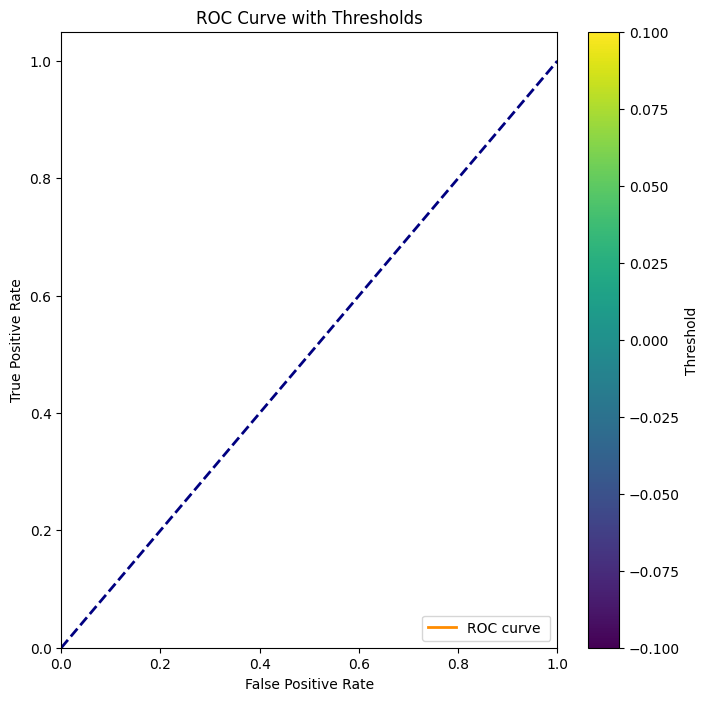

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

class IncrementalRecommendationSystem:
    def __init__(self, df):
        self.df = df
        self.rating_weight = 0.7
        self.top_n = 6
        self.tfidf_vectorizer = TfidfVectorizer()
        self.scaler = MinMaxScaler()
        self.train_data = None  # Initialize train_data attribute
        self.test_data = None   # Initialize test_data attribute
        self.update_similarity_scores()

    def update_similarity_scores(self):

        # Calculate cosine similarity based on average ratings
        rating_similarity = cosine_similarity(self.df[['rating']])

        # Calculate cosine similarity based on book titles
        title_matrix = self.tfidf_vectorizer.fit_transform(self.df['title'])
        title_similarity = cosine_similarity(title_matrix)

        # Normalize the rating similarity scores to the range [0, 1]
        rating_similarity = self.scaler.fit_transform(rating_similarity)

        # Calculate cosine similarity based on Generes ratings
        generes_matrix = self.tfidf_vectorizer.fit_transform(self.df['generes'])
        generes_similarity = cosine_similarity(generes_matrix)

        # Normalize the generes similarity scores to the range [0, 1]
        generes_similarity = self.scaler.fit_transform(generes_similarity)

        # Calculate cosine similarity based on clusters
        cluster_similarity = cosine_similarity(self.df[['cluster_label']])

        # Normalize the cluster similarity scores to the range [0, 1]
        cluster_similarity = self.scaler.fit_transform(cluster_similarity)

        # Create a DataFrame from the combined similarity matrix
        self.combined_similarity = (
            self.rating_weight * rating_similarity +
            (1 - self.rating_weight) * cluster_similarity +
            (1 - self.rating_weight) * title_similarity +
            (1 - self.rating_weight) * generes_similarity
        )

        # Create a DataFrame from the combined similarity matrix
        self.combined_similarity_df = pd.DataFrame(
            self.combined_similarity,
            columns=self.df['title'],
            index=self.df['title']
        )



    def split_data(self, test_size=0.2):
        # Split the dataset into training and test sets
        self.train_data, self.test_data = train_test_split(self.df, test_size=test_size, random_state=42)


    def recommend_books(self, book_title):
        if book_title in self.df['title'].values:
            # Transpose the DataFrame and sort it by the specified row (book_title)
            similar_books = self.combined_similarity_df.loc[book_title].sort_values(ascending=False)[1:self.top_n+1].index.tolist()

            return similar_books
        else:
            return []

    def add_new_data(self, new_data):
        # Assuming new_data is a DataFrame with columns: 'title', 'rating', 'generes', 'cluster_label'
        self.df = pd.concat([self.df, new_data], ignore_index=True)
        self.update_similarity_scores()

    def calculate_ground_truth(self, book_title):
        true_positives = self.test_data['title'].apply(lambda x: 1 if x == book_title else 0)
        true_negatives = self.test_data['title'].apply(lambda x: 1 if x != book_title else 0)
        return true_positives, true_negatives

    def split_and_evaluate_roc(self, book_title, chunk_size=0.05):
        if not 0 < chunk_size <= 1:
            raise ValueError("chunk_size must be between 0 and 1.")

        total_len = len(self.test_data)
        chunk_len = int(total_len * chunk_size)

        all_true_positives = []
        all_true_negatives = []

        for i in range(0, total_len, chunk_len):
            chunk = self.test_data[i:i + chunk_len]
            if chunk.empty:
                break

            self.add_new_data(chunk)

            true_positives, true_negatives = self.calculate_ground_truth(book_title)

            all_true_positives.extend(true_positives)
            all_true_negatives.extend(true_negatives)

        self.plot_roc_curve(all_true_positives, all_true_negatives)


    def plot_roc_curve(self, true_positives, true_negatives):
        fpr, tpr, thresholds = roc_curve(true_positives, true_negatives)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve '.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

        # Plot each point on the ROC curve
        plt.scatter(fpr, tpr, c=thresholds, cmap='viridis', s=50, edgecolors='k', marker='o')

        # Annotate the points with corresponding thresholds
        for i, threshold in enumerate(thresholds):
            plt.annotate(f'{threshold:.2f}', (fpr[i], tpr[i]), textcoords="offset points", xytext=(0, 5), ha='center')

        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve with Thresholds')
        plt.colorbar(label='Threshold')
        plt.legend(loc='lower right')
        plt.show()
# Example usage:
# book_title = "The Tower of the Swallow: Witcher 6"
book_title = "After Anna"

# Initialize the recommendation system
recommendation_system = IncrementalRecommendationSystem(df2)

# Split the updated data into training and test sets
recommendation_system.split_data()

# Continuously add and evaluate ROC curve in 5% chunks until encountering an empty row
recommendation_system.split_and_evaluate_roc(book_title, chunk_size=0.05)


**Elbow Method for deciding number of Clusters.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

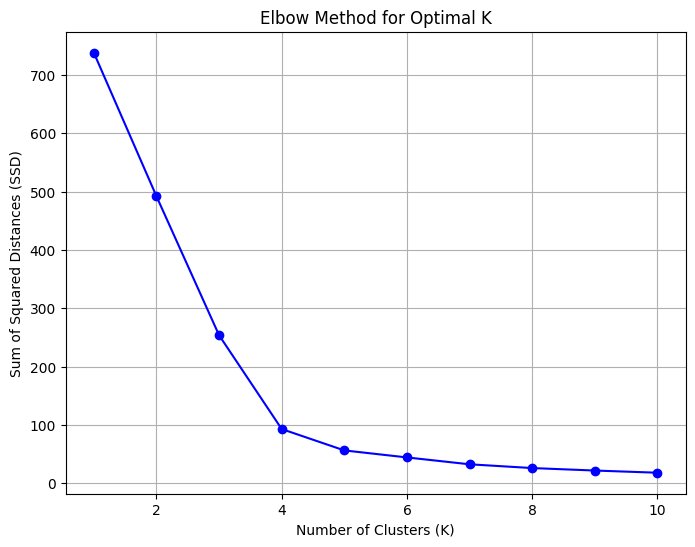

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load your book recommendation dataset into a Pandas DataFrame
# df = pd.read_csv('your_dataset.csv')

# Select the relevant features for clustering (genres)
selected_features = df2[['rating','page_count','price']]

# Apply one-hot encoding to the 'generes' column
# encoder = OneHotEncoder(sparse=False)
# genres_encoded = encoder.fit_transform(df2[['rating','price','page_count']])

# Standardize the features (important for K-means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Determine the range of K values to test
k_values = range(1, 11)  # Test K from 1 to 10 clusters
ssd_values = []  # To store the sum of squared distances for each K

# Calculate the sum of squared distances (SSD) for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    ssd_values.append(kmeans.inertia_)

# Plot the SSD values against K values to find the "elbow"
plt.figure(figsize=(8, 6))
plt.plot(k_values, ssd_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid(True)
plt.show()
